# EOG & ECG 

## EOG visualization

In [52]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw.copy().filter(1, None))

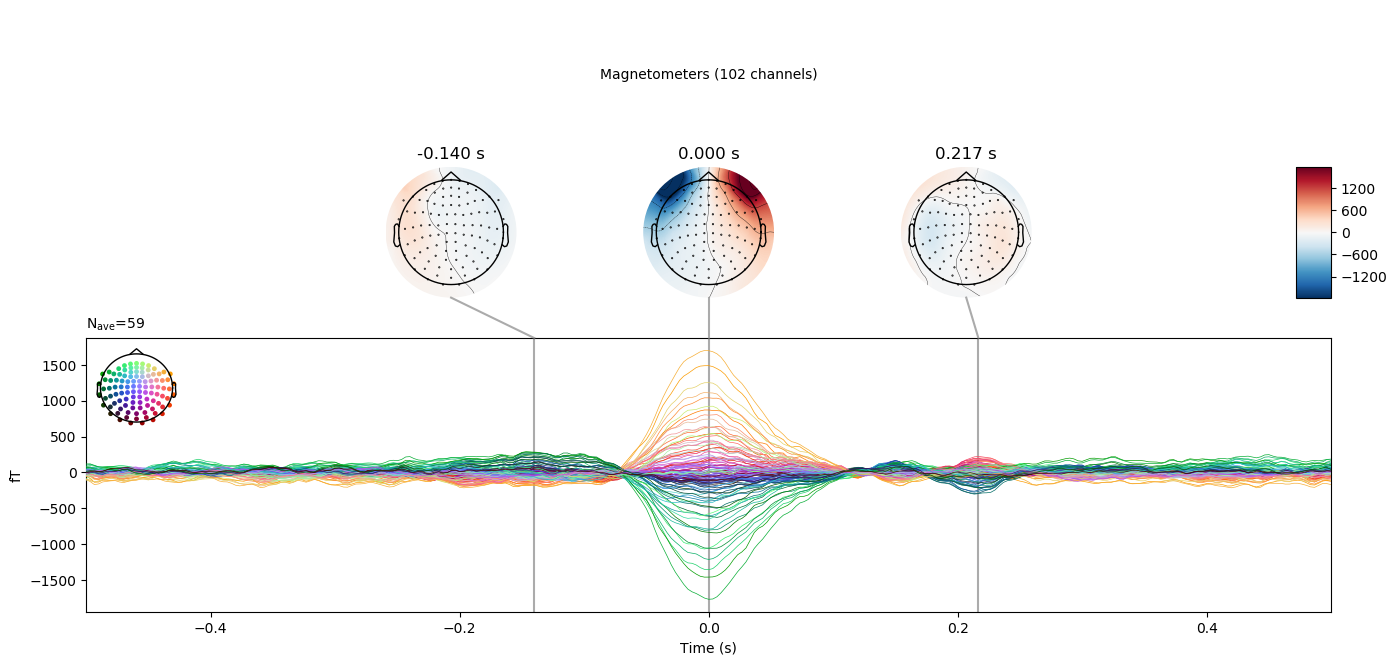

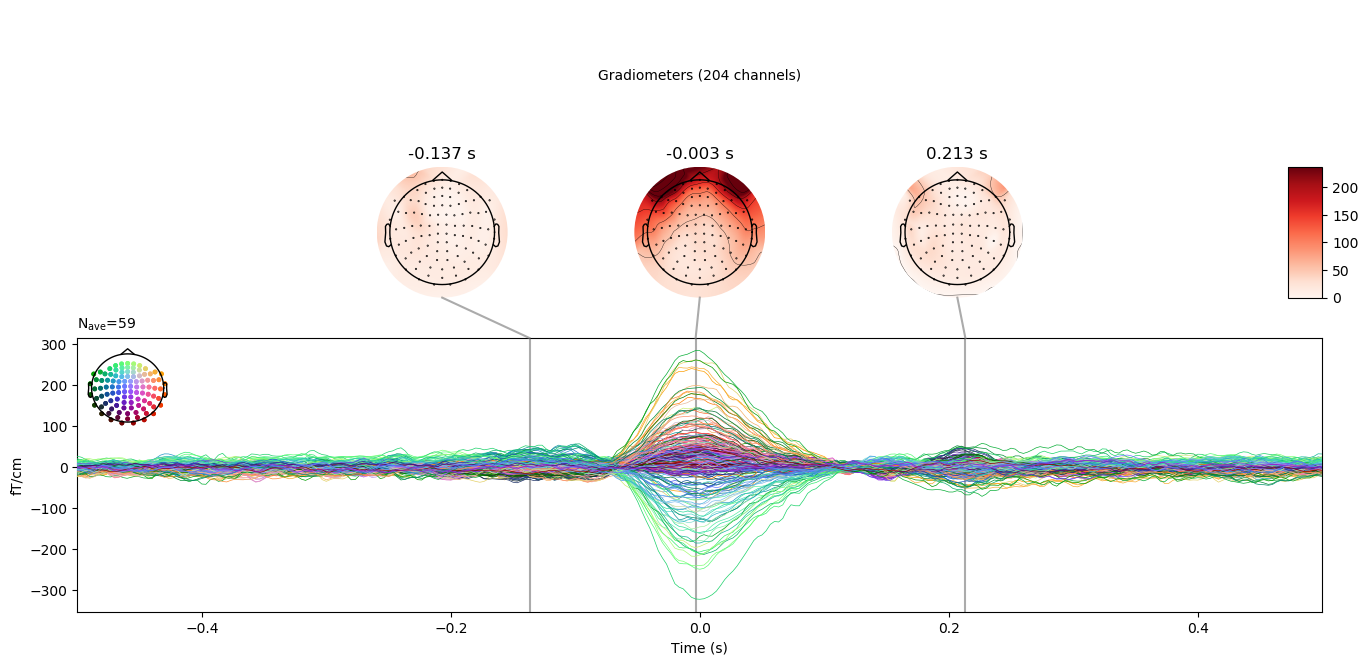

In [53]:
fig1, fig2 = eog_epochs.average().plot_joint(show=False);
fig1.set_size_inches(15, 7)
fig1.set_dpi(100)
fig2.set_size_inches(15, 7)
fig2.set_dpi(100)
# The solution to customize the size of the figures took an embarassing amount of time（─.─||）~EA

In [ ]:
## ECG visualization

In [54]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw.copy().filter(1, None))

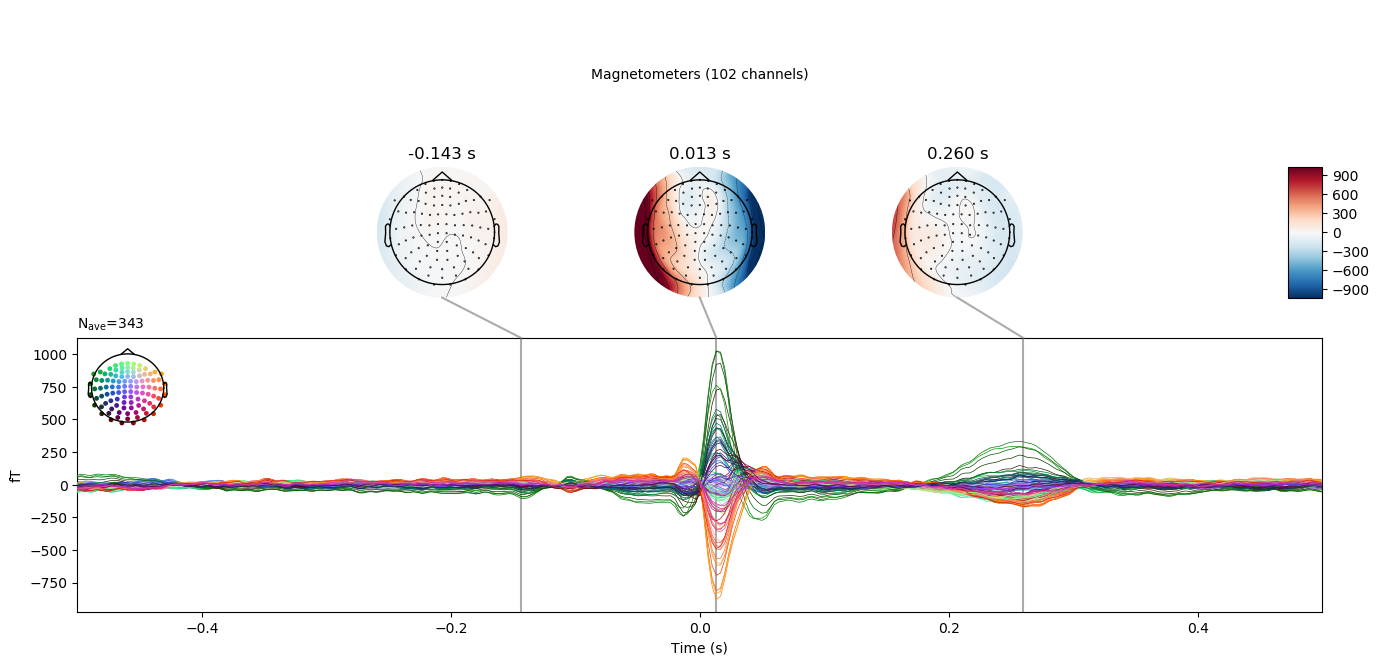

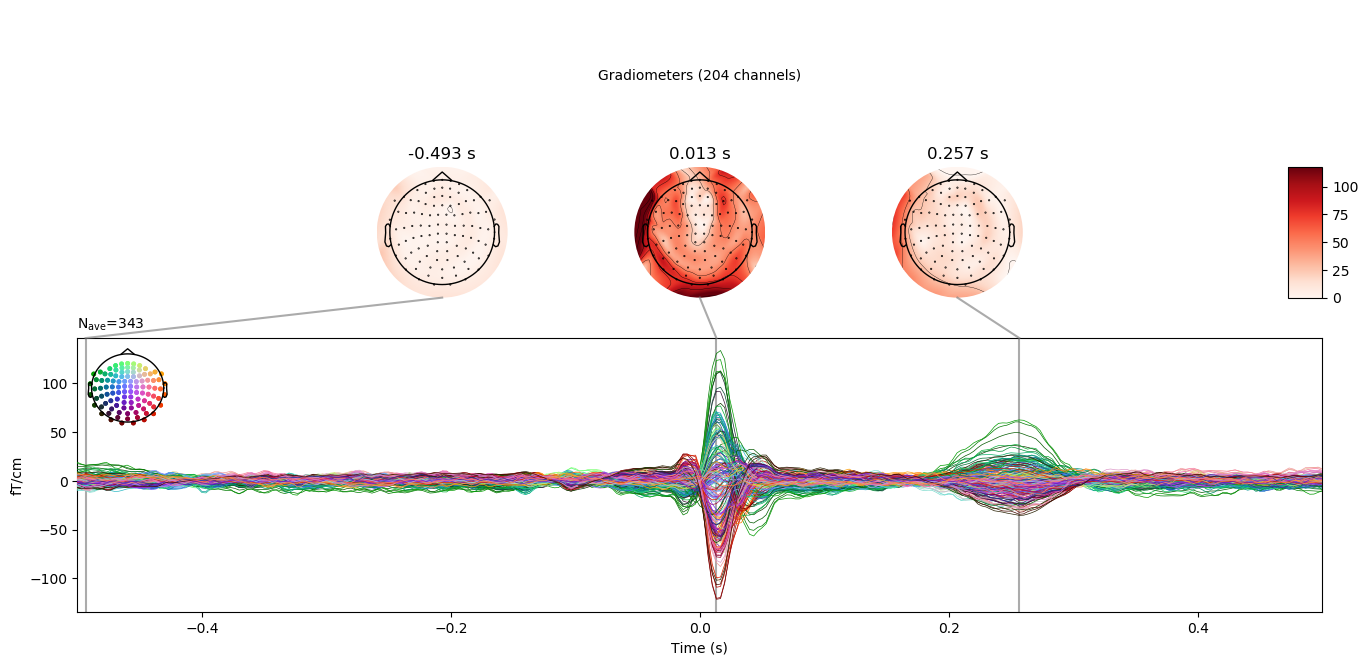

In [55]:
fig1, fig2 = ecg_epochs.average().plot_joint(show=False);
fig1.set_size_inches(15, 7)
fig1.set_dpi(100)
fig2.set_size_inches(15, 7)
fig2.set_dpi(100)

In [ ]:
## Obtaining SSP/PCA projections for EOG & ECG

In [56]:
layouts = [mne.find_layout(raw.info, ch_type=ch) for ch in ("mag", "grad")]
projs_eog, _ = mne.preprocessing.compute_proj_eog(raw, n_mag=3, n_grad=3, average=True)
projs_ecg, _ = mne.preprocessing.compute_proj_ecg(raw, n_mag=3, n_grad=3, average=True)

<ipython-input-56-889cd3a7c3a7>:3: DeprecationWarning: reject_by_annotation in find_ecg_events defaults to False in 0.18 but will change to True in 0.19, set it explicitly to avoid this warning
  projs_ecg, _ = mne.preprocessing.compute_proj_ecg(raw, n_mag=3, n_grad=3, average=True)


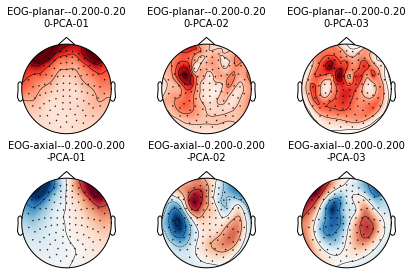

In [57]:
mne.viz.plot_projs_topomap(projs_eog, layout=layouts);

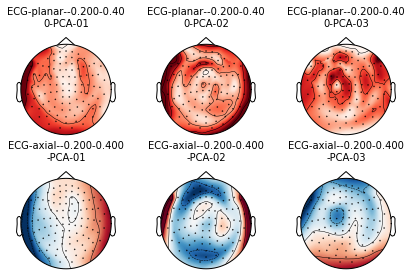

In [58]:
mne.viz.plot_projs_topomap(projs_ecg, layout=layouts);

In [ ]:
## Epochs prior to PCA application

In [59]:
reject2 = dict(mag=reject['mag'], grad=reject['grad'])
epochs_clean = mne.Epochs(raw, events, event_id, epoch_beg_s, epoch_end_s, proj=False,
                          picks=picks, baseline=baseline, preload=False, reject=reject2)
epochs_clean.add_proj(projs_eog + projs_ecg)
epochs = epochs_clean

In [64]:
%matplotlib qt
if interactive:
    epochs.plot();

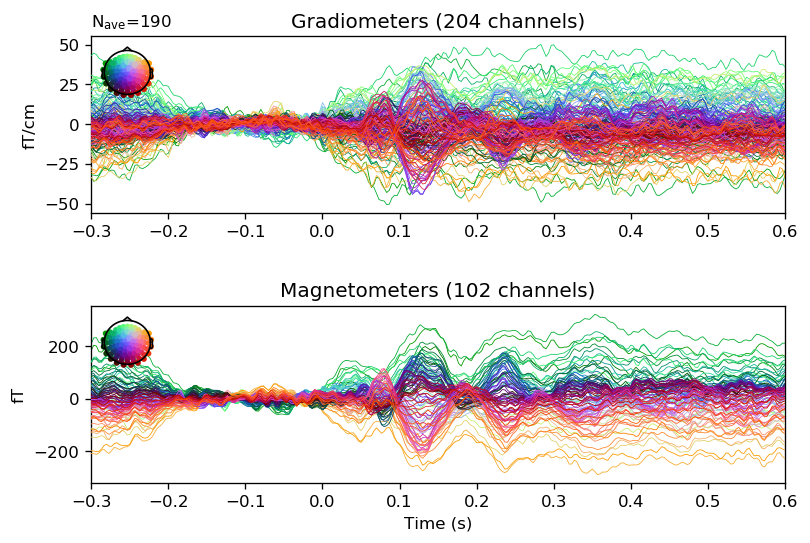

In [93]:
%matplotlib inline
fig = epochs_clean.copy().average().plot(spatial_colors=True, show=False);
fig.set_size_inches(7, 5)
fig.set_dpi(120)
plt.savefig('epochs-before-pca.pdf')

In [ ]:
The following are the events that are supposed to be dropped from excessive noise in specific channels. This does not yet include EOG and ECG noise, technically, although those channels may be problematic due to heart/eye blink noise.

In [87]:
print('Epochs Drop Log:')
print(epochs.drop_log)

Epochs Drop Log:
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['MEG0121'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['MEG0121'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['IGNORED'], ['IGNORED']]


In [ ]:
## Epochs after EOG/ECG PCA

In [78]:
projs_eog

[<Projection  |  EOG-planar--0.200-0.200-PCA-01, active : False, n_channels : 204>,
 <Projection  |  EOG-planar--0.200-0.200-PCA-02, active : False, n_channels : 204>,
 <Projection  |  EOG-planar--0.200-0.200-PCA-03, active : False, n_channels : 204>,
 <Projection  |  EOG-axial--0.200-0.200-PCA-01, active : False, n_channels : 102>,
 <Projection  |  EOG-axial--0.200-0.200-PCA-02, active : False, n_channels : 102>,
 <Projection  |  EOG-axial--0.200-0.200-PCA-03, active : False, n_channels : 102>]

In [82]:
projs_eog[::3]

[<Projection  |  EOG-planar--0.200-0.200-PCA-01, active : False, n_channels : 204>,
 <Projection  |  EOG-axial--0.200-0.200-PCA-01, active : False, n_channels : 102>]

In [85]:
list( projs_ecg[i] for i in [0,1,3,4] )

[<Projection  |  ECG-planar--0.200-0.400-PCA-01, active : False, n_channels : 204>,
 <Projection  |  ECG-planar--0.200-0.400-PCA-02, active : False, n_channels : 204>,
 <Projection  |  ECG-axial--0.200-0.400-PCA-01, active : False, n_channels : 102>,
 <Projection  |  ECG-axial--0.200-0.400-PCA-02, active : False, n_channels : 102>]

In [ ]:
For EOG, selecting every third PCA component, starting with the first one.

For ECG, selecting first, second, fourth, and fifth components.

In [95]:
epochs_pca = epochs_clean.copy().add_proj(projs_eog[::3] + list(projs_ecg[i] for i in [0,1,3,4]))  # epochs.copy()?
epochs_pca.apply_proj()

<Epochs  |   190 events (all good), -0.3 - 0.6 sec, baseline [-0.2, 0], ~126.7 MB, data loaded,
 'left/dur1/cont017': 6
 'left/dur1/cont033': 6
 'left/dur1/cont050': 6
 'left/dur1/cont100': 6
 'left/dur2/cont017': 6
 'left/dur2/cont033': 6
 'left/dur2/cont050': 6
 'left/dur2/cont100': 6
 'left/dur3/cont017': 6
 'left/dur3/cont033': 6
 'left/dur3/cont050': 6
 'left/dur3/cont100': 6
 'left/dur4/cont017': 6
 'left/dur4/cont033': 6
 'left/dur4/cont050': 6
 'left/dur4/cont100': 6
 'right/dur1/cont017': 6
 'right/dur1/cont033': 6
 'right/dur1/cont050': 6
 'right/dur1/cont100': 6
 'right/dur2/cont017': 6
 'right/dur2/cont033': 6
 'right/dur2/cont050': 5
 'right/dur2/cont100': 6
 'right/dur3/cont017': 6
 'right/dur3/cont033': 6
 'right/dur3/cont050': 6
 'right/dur3/cont100': 6
 'right/dur4/cont017': 5
 'right/dur4/cont033': 6
 'right/dur4/cont050': 6
 'right/dur4/cont100': 6>

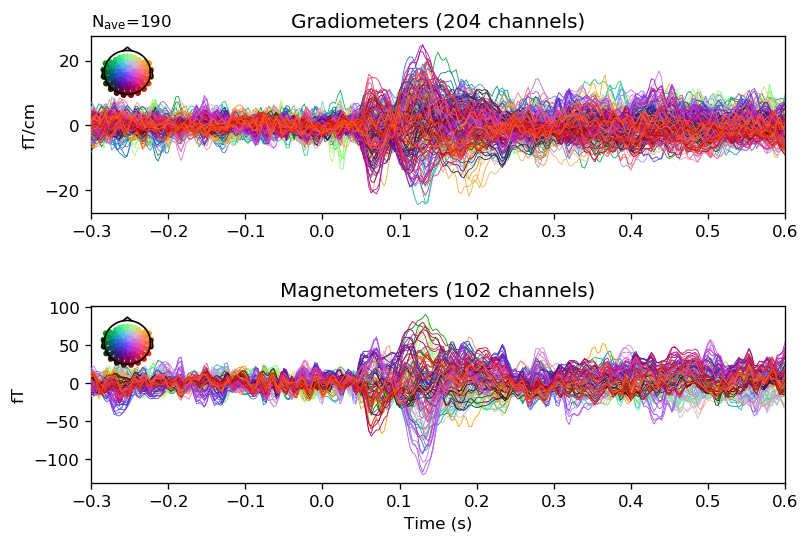

In [96]:
%matplotlib inline
fig = epochs_pca.copy().average().plot(spatial_colors=True, show=False);
fig.set_size_inches(7, 5)
fig.set_dpi(120)
plt.savefig('epochs-after-pca.pdf')